In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import BatchNormalization
import os
from keras.applications.vgg16 import VGG16

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
images = []
labels = [] 

In [5]:
for directory_path in glob.glob("/content/drive/MyDrive/ANIMAL/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)
        
images = np.array(images)
labels = np.array(labels)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

In [7]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images,labels_encoded,test_size=0.2, shuffle = True) 

In [8]:
train_images

array([[[[223, 116, 106],
         [236, 128, 115],
         [220, 110,  87],
         ...,
         [253, 207, 158],
         [249, 207, 147],
         [247, 206, 140]],

        [[219, 112, 102],
         [232, 124, 111],
         [218, 108,  85],
         ...,
         [249, 203, 154],
         [245, 203, 145],
         [244, 203, 139]],

        [[215, 109,  96],
         [226, 119, 103],
         [214, 105,  82],
         ...,
         [245, 199, 149],
         [241, 198, 143],
         [241, 199, 141]],

        ...,

        [[219, 238, 252],
         [213, 231, 243],
         [208, 222, 231],
         ...,
         [207, 170, 118],
         [207, 171, 121],
         [207, 171, 121]],

        [[254, 255, 255],
         [255, 255, 255],
         [250, 249, 247],
         ...,
         [206, 169, 117],
         [206, 170, 120],
         [205, 171, 123]],

        [[238, 230, 227],
         [234, 225, 220],
         [229, 218, 212],
         ...,
         [207, 170, 118],
        

In [9]:
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)

In [11]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(144, 144, 3))

for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary() 

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 144, 144, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 144, 144, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 144, 144, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 72, 72, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 72, 72, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 72, 72, 128)       147584    
                                                              

In [12]:
train_feature_extractor=VGG_model.predict(x_train)
train_features = train_feature_extractor.reshape(train_feature_extractor.shape[0], -1)

test_feature_extractor=VGG_model.predict(x_test)
test_features = test_feature_extractor.reshape(test_feature_extractor.shape[0], -1)

In [13]:
model = Sequential()
inputs = Input(shape=np.shape(train_features[1])) 
hidden = Dense(256, activation='relu')(inputs)
output = Dense(10, activation='softmax')(hidden)
model = Model(inputs=inputs, outputs=output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8192)]            0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,099,978
Trainable params: 2,099,978
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
import datetime
start = datetime.datetime.now()
 
history_wo = model.fit(test_features, y_test_binary, epochs=20, verbose=1)

end = datetime.datetime.now()
print("Total execution time without PCA is: ", end-start)

Epoch 1/20
4/4 [==============================] - 1s 23ms/step - loss: 7.5285 - accuracy: 0.0917
Epoch 2/20
4/4 [==============================] - 0s 26ms/step - loss: 3.2233 - accuracy: 0.3583
Epoch 3/20
4/4 [==============================] - 0s 25ms/step - loss: 0.9306 - accuracy: 0.6833
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 0.3297 - accuracy: 0.9083
Epoch 5/20
4/4 [==============================] - 0s 25ms/step - loss: 0.1067 - accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 24ms/step - loss: 0.0644 - accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 27ms/step - loss: 0.0527 - accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 24ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 24ms/step - loss: 0.0233 - accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 26ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 11/20
4/4 [============

dict_keys(['loss', 'accuracy'])


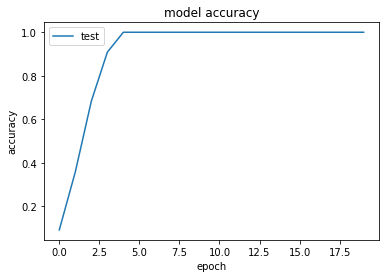

In [16]:
print(history_wo.history.keys())
plt.plot(history_wo.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

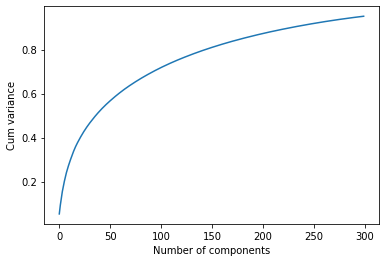

In [17]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=300) 
pca_test.fit(train_features)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

#we want to use 300 principle components
#we can keep as much information as possible
n_PCA_components = 300
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(train_features)
#apply the dimensionality deduction on trained features
test_PCA = pca.transform(test_features) 

In [18]:
model = Sequential()
inputs = Input(shape=(n_PCA_components)) #Shape = n_components
hidden = Dense(256, activation='relu')(inputs)
output = Dense(10, activation='softmax')(hidden)
model = Model(inputs=inputs, outputs=output)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               77056     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 79,626
Trainable params: 79,626
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [20]:
import datetime
start = datetime.datetime.now()

history = model.fit(test_PCA, y_test_binary, epochs=20, verbose=1, shuffle=True)

end = datetime.datetime.now()
print("Total execution time with PCA is: ", end-start)

Epoch 1/20
4/4 [==============================] - 0s 5ms/step - loss: 2.7340 - categorical_accuracy: 0.2000
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 1.0012 - categorical_accuracy: 0.7333
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 0.5158 - categorical_accuracy: 0.9500
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 0.3096 - categorical_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2003 - categorical_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1389 - categorical_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0997 - categorical_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0734 - categorical_accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0555 - categorical_accuracy: 1.0000
Epoch 10/20
4/4 [===========

dict_keys(['loss', 'categorical_accuracy'])


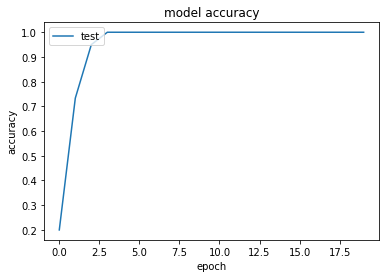

In [21]:
print(history.history.keys())
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()